In [58]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.formula.api as smf 
import statsmodels.api as sm
import seaborn as sns
sns.set(style='whitegrid')

from pandas.tools.plotting import scatter_matrix
from statsmodels.stats.outliers_influence import variance_inflation_factor 

import warnings
warnings.filterwarnings("ignore")

# HR analytic

1.understand what are the most frequent situations explaining why an employee decides to leave. 

2.How to classify the employee into two groups, leave and stay.

3.Who are the employees that worth retaining effort.

In [39]:
# Dataset 
dat = pd.read_csv("HR.csv")
dat['Left'] = dat['left'] 
del dat['left']
dat.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years,department,salary,Left
0,0.38,0.53,2,157,3,0,0,sales,low,1
1,0.80,0.86,5,262,6,0,0,sales,medium,1
2,0.11,0.88,7,272,4,0,0,sales,medium,1
3,0.72,0.87,5,223,5,0,0,sales,low,1
4,0.37,0.52,2,159,3,0,0,sales,low,1


In [40]:
dat.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
satisfaction_level       14999 non-null float64
last_evaluation          14999 non-null float64
number_project           14999 non-null int64
average_montly_hours     14999 non-null int64
time_spend_company       14999 non-null int64
Work_accident            14999 non-null int64
promotion_last_5years    14999 non-null int64
department               14999 non-null object
salary                   14999 non-null object
Left                     14999 non-null int64
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


**Variables**

S: The satisfaction level on a scale of 0 to 1. 

LP: ELast project evaluation by a client on a scale of 0 to 1. 

NP: Represents the number of projects worked on by employee in the last 12 month. 

ANH: Average number of hours worked in the last 12 month for that employee. 

TIC: The amount of time the employee spent in the company, measured in years.

Newborn: This variable will take the value 1 if the employee had a newborn within the last 12 month and 0 otherwise.

left:1 if the employee left the company, 0 if they’re still working here.

In [41]:
# Stat Summary 
dat.describe()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years,Left
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000
mean,0.612834,0.716102,3.803054,201.050337,3.498233,0.144610,0.021268,0.238083
std,0.248631,0.171169,1.232592,49.943099,1.460136,0.351719,0.144281,0.425924
min,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000
25%,0.440000,0.560000,3.000000,156.000000,3.000000,0.000000,0.000000,0.000000
50%,0.640000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000,0.000000
75%,0.820000,0.870000,5.000000,245.000000,4.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,7.000000,310.000000,10.000000,1.000000,1.000000,1.000000


In [42]:
# Check Missing Value
dat.isnull().sum()

satisfaction_level       0
last_evaluation          0
number_project           0
average_montly_hours     0
time_spend_company       0
Work_accident            0
promotion_last_5years    0
department               0
salary                   0
Left                     0
dtype: int64

# Data Exploration

In [44]:
# Proportion of stay and leave 
my_tab = pd.crosstab(index=dat['Left'], columns='count')
my_tab/my_tab.sum()

col_0,count
Left,
0,0.761917
1,0.238083


Text(0.5,1,'Histogram of left')

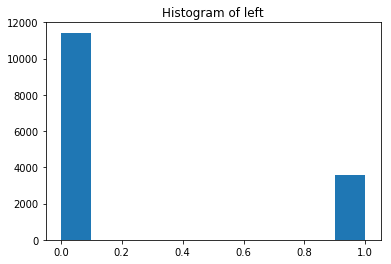

In [47]:
# Plot of target variable 
plt.hist(dat['Left'])
plt.title("Histogram of left")

Note: This is unbalance dataset. 

In [48]:
# Correlation 
dat.corr()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years,Left
satisfaction_level,1.000000,0.105021,-0.142970,-0.020048,-0.100866,0.058697,0.025605,-0.388375
last_evaluation,0.105021,1.000000,0.349333,0.339742,0.131591,-0.007104,-0.008684,0.006567
number_project,-0.142970,0.349333,1.000000,0.417211,0.196786,-0.004741,-0.006064,0.023787
average_montly_hours,-0.020048,0.339742,0.417211,1.000000,0.127755,-0.010143,-0.003544,0.071287
time_spend_company,-0.100866,0.131591,0.196786,0.127755,1.000000,0.002120,0.067433,0.144822
Work_accident,0.058697,-0.007104,-0.004741,-0.010143,0.002120,1.000000,0.039245,-0.154622
promotion_last_5years,0.025605,-0.008684,-0.006064,-0.003544,0.067433,0.039245,1.000000,-0.061788
Left,-0.388375,0.006567,0.023787,0.071287,0.144822,-0.154622,-0.061788,1.000000


Text(0.5,1,'Correlation Coefficients All')

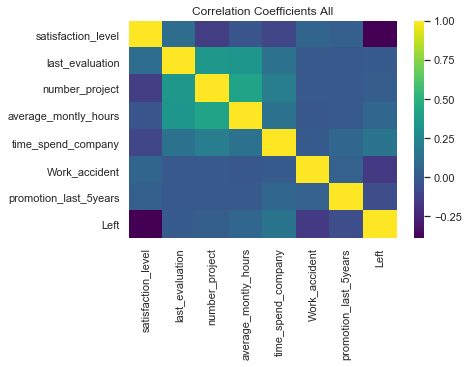

In [61]:
sns.heatmap(data=dat.corr(),cmap='viridis')
plt.title('Correlation Coefficients All')

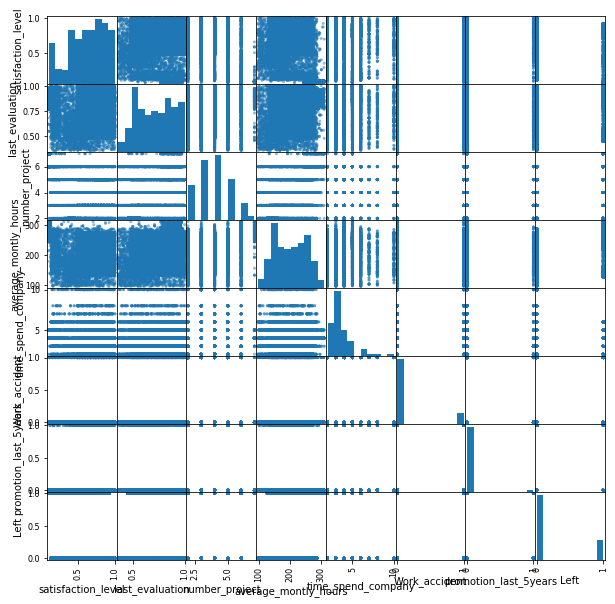

In [49]:
# Scatter Matrix Plot 
matrix = scatter_matrix(dat, figsize=(10,10))

Note: There is no multicollinearity.

In [64]:
# Exploring the relationship between left/stay and other variables 
left = dat[dat['Left'] == 1]
stay = dat[dat['Left'] == 0]

Text(0.5,1,'Satisfaction Level Overall')

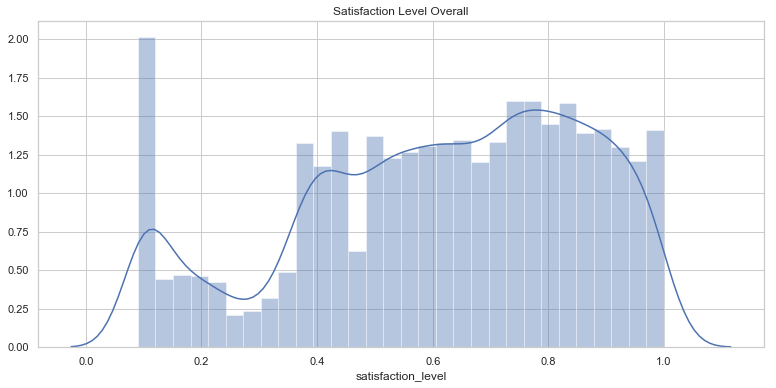

In [74]:
# Satisfaction_level
# Distribustion 
plt.figure(figsize=(13,6))
sns.distplot(dat['satisfaction_level'])
plt.title('Satisfaction Level Overall')

Text(0.5,1,'Satisfaction Level Left vs Stay')

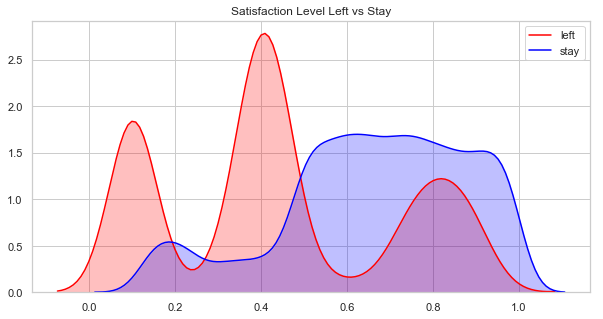

In [81]:
plt.figure(figsize=(10,5))
sns.kdeplot(left['satisfaction_level'], color='red', shade='True')
sns.kdeplot(stay['satisfaction_level'], color='blue', shade='True')
plt.legend(['left', 'stay'])
plt.title("Satisfaction Level Left vs Stay")

Note: Clearly different pattern between left and stay. 

Text(0.5,1,'Last Evaluation vs Satisfaction Level (Hue = Left)')

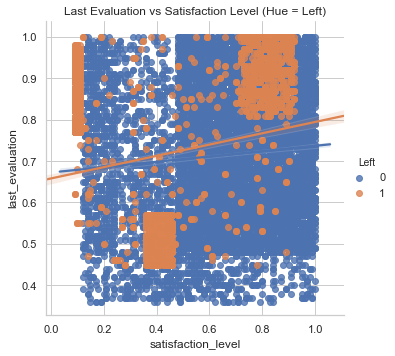

In [85]:
# last evaluation
sns.lmplot(x='satisfaction_level', y='last_evaluation', hue='Left', data=dat)
plt.title('Last Evaluation vs Satisfaction Level (Hue = Left)')

Employees with higher evaluation and satisfaction tend to leave.

Employees with higher evaluation and lower satisfaction tend to leave.

Employees with lower evaluation and medium satisfaction tend to leave.

Text(0.5,1,'Number of Projects vs Satisfaction Level (Hue = Left)')

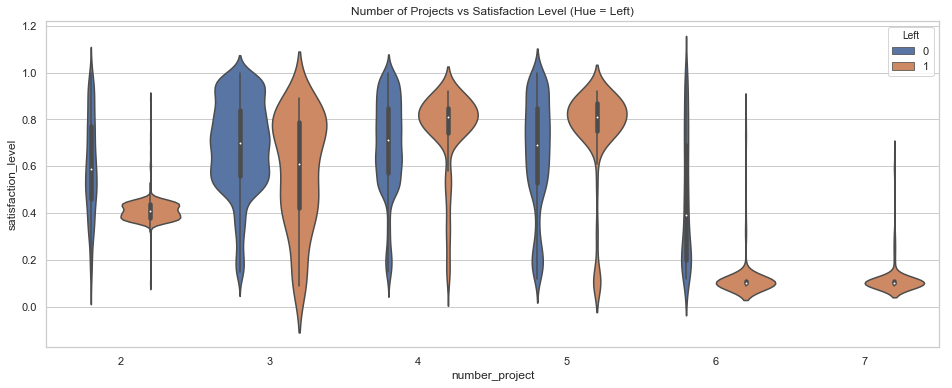

In [88]:
# number project
plt.figure(figsize=(16,6))
sns.violinplot(x='number_project', y='satisfaction_level', data=dat, hue='Left')
plt.title('Number of Projects vs Satisfaction Level (Hue = Left)')

Note: When employee have more projects, the satisfaction level is very low and they trend to leave the company. 

Text(0.5,1,'Average Monthly Hours vs Satisfaction Level')

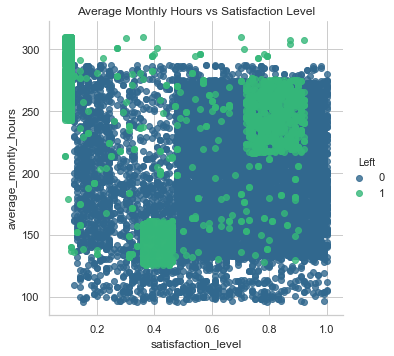

In [90]:
sns.lmplot(x='satisfaction_level', y = 'average_montly_hours', hue='Left', data=dat, palette='viridis',
          fit_reg=False)
plt.title('Average Monthly Hours vs Satisfaction Level')

Note: The pattern is similar to the pattern of Last Evaluation vs Satisfaction Level. We again see the same kind of clusters and so the clusters might mainly be caused by satisfaction

Text(0.5,1,'Salary vs Satisfaction Level')

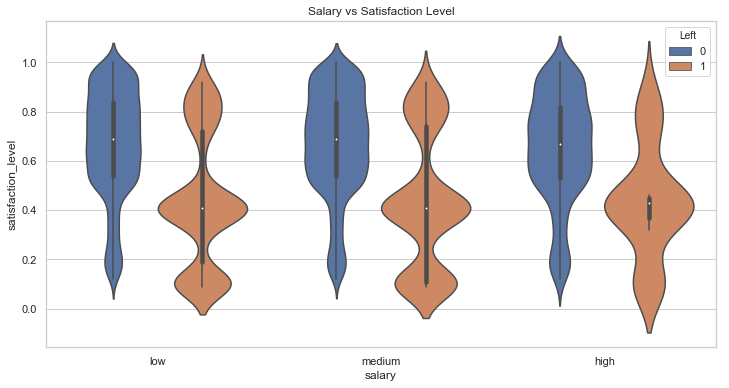

In [91]:
# salary
plt.figure(figsize=(12, 6))
sns.violinplot(x='salary', y='satisfaction_level', data=dat, hue='Left')
plt.titlbe('Salary vs Satisfaction Level')

Note: Regardless of the salary level, the employee with high satisfaction level trend to stay.

# Machine Learning

In [104]:
# Training set and Testing set 
from sklearn.model_selection import train_test_split

train, test = train_test_split(dat, test_size=0.3, random_state=42)

print train.shape
print test.shape

(10499, 10)
(4500, 10)


In [105]:
# Logistic Regression 
x = "+".join(dat.columns[0:8])
my_formula = "Left~" + x

model = smf.glm(formula = my_formula, data=train, family=sm.families.Binomial()).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                   Left   No. Observations:                10499
Model:                            GLM   Df Residuals:                    10482
Model Family:                Binomial   Df Model:                           16
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -4608.6
Date:                Fri, 12 Apr 2019   Deviance:                       9217.3
Time:                        12:37:47   Pearson chi2:                 1.01e+04
No. Iterations:                     6   Covariance Type:             nonrobust
=============================================================================================
                                coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------
Intercept                     0.0126      0.168      0.075      0.940      -0.316       0.341
department[T.RandD]          -0.5709      0.165     -3.467      0.001      -0.894      -0.248
department[T.accounting]      0.2028      0.144      1.406      0.160      -0.080       0.485
department[T.hr]              0.4219      0.146      2.885      0.004       0.135       0.708
department[T.management]     -0.5966      0.173     -3.451      0.001      -0.935      -0.258
department[T.marketing]       0.2478      0.144      1.718      0.086      -0.035       0.531
department[T.product_mng]     0.1150      0.138      0.833      0.405      -0.156       0.386
department[T.sales]           0.1892      0.105      1.795      0.073      -0.017       0.396
department[T.support]         0.2086      0.115      1.810      0.070      -0.017       0.435
department[T.technical]       0.2650      0.111      2.387      0.017       0.047       0.483
satisfaction_level           -4.1795      0.116    -36.061      0.000      -4.407      -3.952
last_evaluation               0.6737      0.175      3.851      0.000       0.331       1.017
number_project               -0.2922      0.025    -11.713      0.000      -0.341      -0.243
average_montly_hours          0.0046      0.001      7.599      0.000       0.003       0.006
time_spend_company            0.2390      0.018     13.165      0.000       0.203       0.275
Work_accident                -1.4554      0.104    -13.964      0.000      -1.660      -1.251
promotion_last_5years        -1.5876      0.299     -5.310      0.000      -2.174      -1.002
=============================================================================================
"""

# Prediction

**Predicting and Assessing the Model**

In [112]:
# Unbalance dataset, cutoff is not 0.5
prob = model.predict(test)
prediction = [0 if p < 0.6 else 1 for p in prob]

**Confusion Matrix**

In [113]:
from sklearn.metrics import confusion_matrix
confusion_matrix(test['Left'], prediction)

array([[3250,  178],
       [ 839,  233]])

In [137]:
# Accuracy Rate 
round((3250.0+233)/(3250+178+839+233),5)

0.774

**Error Measure**

In [151]:
tn, fp, fn, tp = confusion_matrix(test["Left"], prediction).ravel()
#print(tn,fp,fn,tp)
tn = tn.astype(float)
fn = fn.astype(float)
fp = tn.astype(float)
tp = tn.astype(float)
print type(tn)
sensitivity=tp/(tp+fn)
specificity=tn/(fp+tn)
misClassError=(fp+fn)/(fp+fn+tn+tp)
print ('Sensitivity:',sensitivity,'\nSpecificity:',specificity,'\nMiss Classification Rate:',misClassError)

<type 'numpy.float64'>
('Sensitivity:', 0.7948153582783076, '\nSpecificity:', 0.5, '\nMiss Classification Rate:', 0.38615544432902066)


**ROC Curve**

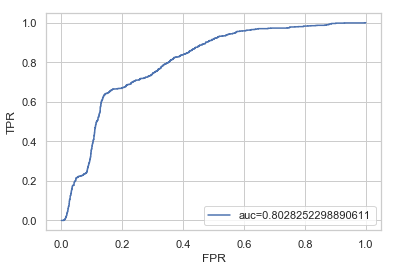

In [152]:
from sklearn import metrics

y_pred_proba = prob
y_test=test['Left']
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)
plt.plot(fpr,tpr,label="auc="+str(auc))
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.legend(loc=4)
plt.show()